# MNIST like image generation with Conditional Generative Adverarial Networks 

In [10]:
import h5py
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import ops
from keras.saving import load_model as load_keras_model

In [2]:
from image_generators.conditional_gan import generate_samples
from image_generators.conditional_gan import generate_spurious_samples
from image_generators.conditional_gan.default_components import config

In [6]:
generator = load_keras_model('models/mnist_gan_generator.keras') 

## I. Example usage of trained image generator

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


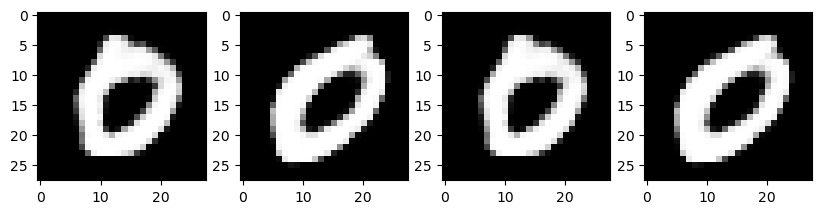

In [8]:
generated_images = generate_samples(generator, config, label=0, sample_count=4)
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
axs[0].imshow(generated_images[0,:,:,0], cmap='gray', vmin=0, vmax=1)
axs[1].imshow(generated_images[1,:,:,0], cmap='gray', vmin=0, vmax=1)
axs[2].imshow(generated_images[0,:,:,0], cmap='gray', vmin=0, vmax=1)
axs[3].imshow(generated_images[1,:,:,0], cmap='gray', vmin=0, vmax=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


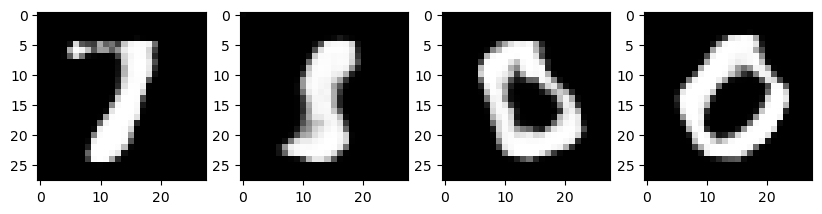

In [12]:
generated_images = generate_spurious_samples(generator, config, label_1=0, label_2=1, prop_vec=ops.linspace(0, 1, 4))
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
axs[0].imshow(generated_images[0,:,:,0], cmap='gray', vmin=0, vmax=1)
axs[1].imshow(generated_images[1,:,:,0], cmap='gray', vmin=0, vmax=1)
axs[2].imshow(generated_images[2,:,:,0], cmap='gray', vmin=0, vmax=1)
axs[3].imshow(generated_images[3,:,:,0], cmap='gray', vmin=0, vmax=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


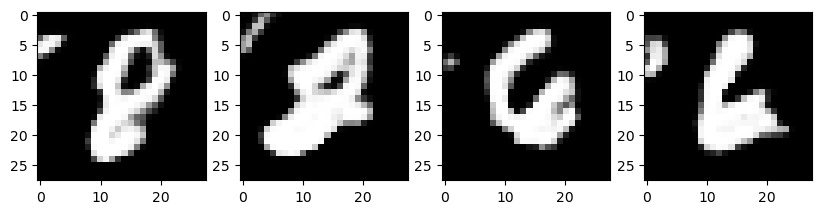

In [13]:
generated_images = generate_spurious_samples(generator, config, label_1=6, label_2=8, prop_vec=ops.linspace(0, 1, 4))
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
axs[0].imshow(generated_images[0,:,:,0], cmap='gray', vmin=0, vmax=1)
axs[1].imshow(generated_images[1,:,:,0], cmap='gray', vmin=0, vmax=1)
axs[2].imshow(generated_images[2,:,:,0], cmap='gray', vmin=0, vmax=1)
axs[3].imshow(generated_images[3,:,:,0], cmap='gray', vmin=0, vmax=1)

## II. Trainingset generation

We generate separate datasets for numbers 0,1,6 and 8. Each of size 100,000 samples.

In [27]:
N = 100000
images_of_zero  = tf.squeeze(generate_samples(generator, config, 0, N), axis=-1)
images_of_one   = tf.squeeze(generate_samples(generator, config, 1, N), axis=-1)
images_of_six   = tf.squeeze(generate_samples(generator, config, 6, N), axis=-1)
images_of_eight = tf.squeeze(generate_samples(generator, config, 8, N), axis=-1)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step 


In [28]:
with h5py.File('data/digits.h5', 'w') as hf:
    hf.create_dataset('number_0', data=images_of_zero)
    hf.create_dataset('number_1', data=images_of_one)
    hf.create_dataset('number_6', data=images_of_six)
    hf.create_dataset('number_8', data=images_of_eight)

# III. Trainingset validation

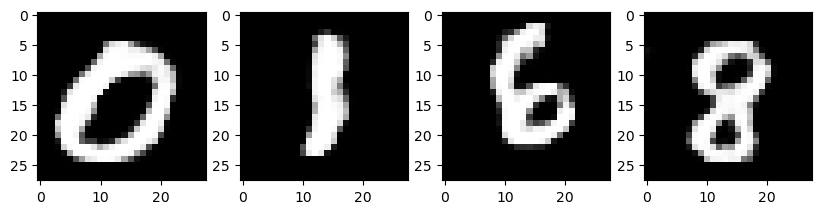

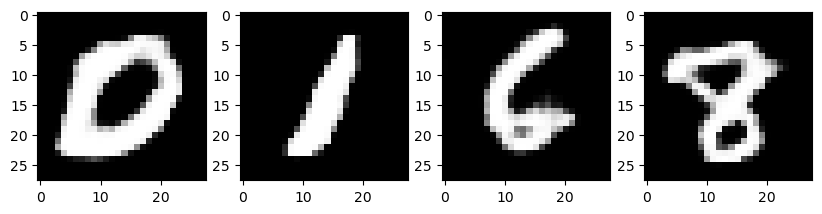

In [7]:
with h5py.File('data/digits.h5', 'r') as hf:
    sample_0 = hf['number_0'][0, :, :]
    sample_1 = hf['number_1'][0, :, :]
    sample_6 = hf['number_6'][0, :, :]
    sample_8 = hf['number_8'][0, :, :]
    
    sample_01 = hf['number_0'][1, :, :]
    sample_11 = hf['number_1'][1, :, :]
    sample_61 = hf['number_6'][1, :, :]
    sample_81 = hf['number_8'][1, :, :]
    
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
axs[0].imshow(sample_0, cmap='gray', vmin=0, vmax=1)
axs[1].imshow(sample_1, cmap='gray', vmin=0, vmax=1)
axs[2].imshow(sample_6, cmap='gray', vmin=0, vmax=1)
axs[3].imshow(sample_8, cmap='gray', vmin=0, vmax=1)

fig, axs = plt.subplots(1, 4, figsize=(10, 8))
axs[0].imshow(sample_01, cmap='gray', vmin=0, vmax=1)
axs[1].imshow(sample_11, cmap='gray', vmin=0, vmax=1)
axs[2].imshow(sample_61, cmap='gray', vmin=0, vmax=1)
axs[3].imshow(sample_81, cmap='gray', vmin=0, vmax=1)